In [1]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. 데이터셋 생성
(x_train, y_train), (x_test, y_test)=mnist.load_data() # 학습용과 검증용 분리
# 데이터 전처리
x_train=x_train.reshape(60000,784).astype('float32') / 255.0
x_test=x_test.reshape(10000,784).astype('float32') / 255.0
# 원핫인코딩(one-hot encoding) 처리
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
print(y_train[:5])
# 학습용 데이터셋의 일부를 validation set으로 분리 - (train, validation, test)
# 인공신경망의 파라미터를 튜닝하고 학습중지점을 설정하는 용도로 사용
x_val=x_train[:12600]
x_train=x_train[12600:]
y_val=y_train[:12600]
y_train=y_train[12600:]

# 2. 모델 구성
model=Sequential()
model.add(Dense(units=512, input_dim=28*28, activation='relu')) # 은닉층
model.add(Dense(units=10, activation='softmax')) # 출력층

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
# 4. 모델 학습
hist=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
1482/1482 [==============================] - 9s 3ms/step - loss: 0.6750 - accuracy: 0.8373 - val_loss: 0.3854 - val_accuracy: 0.8971
Epoch 2/5
1482/1482 [==============================] - 5s 3ms/step - loss: 0.3485 - accuracy: 0.9048 - val_loss: 0.3119 - val_accuracy: 0.9144
Epoch 3/5
1482/1482 [==============================] - 5s 3ms/step - loss: 0.2966 - accuracy: 0.9169 - val_loss: 0.2782 - val_accuracy: 0.9220
Epoch 4/5
1482/1482 [==============================] - 5s 3ms/step - loss: 0.2658 - accuracy: 0.9260 - val_loss: 0.2564 - val_accuracy: 0.9269
Epoch 5/5
1482/1482 [==============================] - 6s 4ms/step - loss: 0.2426 - accuracy: 0.9332 - val_loss: 0.2370 - val_accuracy: 0.9324


In [3]:
import numpy as np

# 5. 모델 평가
loss_and_metrics=model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print('loss_and_metrics : '+str(loss_and_metrics))

# 6. 모델 저장(지정한 디렉토리 하위에 assets, variables 디렉토리가 자동 생성)
model.save('d:/data/mnist')

loss_and_metrics : [0.22713905572891235, 0.9354000091552734]
INFO:tensorflow:Assets written to: d:/data/mnist\assets


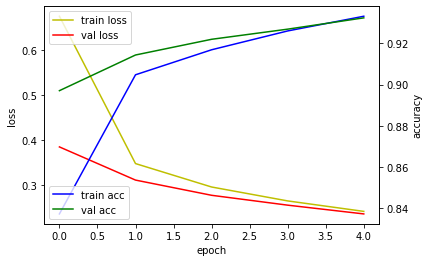

In [5]:
import matplotlib.pyplot as plt

# 7. 모델 학습 과정 표시
fig, loss_ax=plt.subplots()
# 서로 다른 y축을 가진 2개의 x데이터를 사용하여 동일한 플롯에 그래프 출력
acc_ax=loss_ax.twinx() # x축에 2개의 요소 사용
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()


In [6]:
from tensorflow.keras.models import load_model
from numpy import argmax

# 전체 샘플 중에서 50개 샘플 선택
xhat_idx=np.random.choice(x_test.shape[0], 50)
xhat=x_test[xhat_idx]
# 모형이 저장된 디렉토리 지정
model=load_model('d:/data/mnist')
yhat=model.predict(xhat)

for i in range(10):
    print('실제값 :',argmax(y_test[xhat_idx[i]]), ', 예측값 :', np.argmax(yhat[i]))


실제값 : 1 , 예측값 : 1
실제값 : 0 , 예측값 : 0
실제값 : 7 , 예측값 : 7
실제값 : 0 , 예측값 : 0
실제값 : 0 , 예측값 : 0
실제값 : 4 , 예측값 : 4
실제값 : 1 , 예측값 : 1
실제값 : 8 , 예측값 : 3
실제값 : 4 , 예측값 : 4
실제값 : 7 , 예측값 : 7
